Structure: 

1. Import Dependencies
2. Import Helper Functions
2. Load Dataset

Model 0 - Feature Extraction

4. Create Model Checkpoints
5. Create Model
6. Compile Model
7. Fit Model
8. Evaluate Model

Model 1 - Fine Tuning

9. Create Model Checkpoints
10. Create Model
11. Compile Model
12. Fit Model
13. Evaluate Model



9. Save Model
10. Make Predictions from Loaded Model

# 1 . Import Dependencies

In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow_hub as hub
from tensorflow.keras import layers 

# 2 . Import Helper Functions

In [4]:
# Download helper functions script
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2023-02-23 19:28:24--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py.1’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-02-23 19:28:24 (52.7 MB/s) - ‘helper_functions.py.1’ saved [10246/10246]



In [5]:
# Import calculate_results helper function
from helper_functions import calculate_results,create_tensorboard_callback,plot_loss_curves

# 3 . Load Dataset

In [6]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)

# Preprocess data (Normalize)
# train_datagen  = ImageDataGenerator(rescale=1/255.0)
train_datagen_augmented = ImageDataGenerator(rescale=1/255., ## THIS IS THE CHANGE !!!! 
                                            rotation_range=0.2,
                                            shear_range=0.2,
                                            zoom_range=0.2,
                                            width_shift_range=0.2,
                                            height_shift_range=0.3,
                                            horizontal_flip=True)
valid_datagen = ImageDataGenerator(rescale=1/255.0)

# Setup paths to our data directories
# Setup paths to our data directories
train_dir = '/content/drive/MyDrive/AI_Research/Villains/Train'
test_dir = '/content/drive/MyDrive/AI_Research/Villains/Test'

# Import data from directories and turn it into batches
train_data_augmented = train_datagen_augmented.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode='categorical',
                                               seed=42)
valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode='categorical',
                                               seed=42)


Found 42 images belonging to 3 classes.
Found 18 images belonging to 3 classes.


**Note :** In order to get the class names, we need to use below function to load the data. But it will not allow you to do the Augmentation. In this case, we need to manually add Augmentation layers. 

example: [link text](https://www.tensorflow.org/tutorials/images/data_augmentation)


data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])

In [7]:
# # Setup paths to our data directories
# train_dir = '/content/drive/MyDrive/AI_Research/Villains/Train'
# test_dir = '/content/drive/MyDrive/AI_Research/Villains/Test'

# IMG_SIZE = (224,224)
# BATCH_SIZE = 32

# train_data_2 = tf.keras.preprocessing.image_dataset_from_directory(directory = train_dir,
#                                                                             image_size=IMG_SIZE,
#                                                                             label_mode = 'categorical',
#                                                                             batch_size=BATCH_SIZE,)
# test_data_2 = tf.keras.preprocessing.image_dataset_from_directory(directory = test_dir,
#                                                                 image_size=IMG_SIZE,
#                                                                 label_mode='categorical',
#                                                                 batch_size=BATCH_SIZE)

# ###### ###### (Feature Extraction) ####### ##### #




# 4 . Create Model Checkpoint

In [8]:
# Set Checkpoint paths
checkpoint_path = 'Checkpoints_weights/feature_extracted_checkpoints.ckpt'

# Create a ModelCheckpoint callback that saves the model's weights only
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                         save_weights_only=True,
                                                         save_best_only=False,
                                                         save_freq='epoch', # save ever epoch
                                                         verbose=1)

# 5 . Create Model 0 : Feature Extraction (resnet)

In [9]:
# Creating Feature Extraction Layer
feature_extractor_layer = hub.KerasLayer('https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/4',
                                           trainable=False,
                                           name='feature_extraction_layer',
                                           input_shape=(224,224,3)) # feaze the already learned patterns

In [11]:
  # Create our own model
model_0 = tf.keras.Sequential([
    feature_extractor_layer,
    layers.Dense(3,activation='softmax',name='output_layer')
])

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


# 6 . Compile Model

In [12]:
# Compile the model
model_0.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy']
)

# 7 . Fit Model

In [14]:
history_0 = model_0.fit(train_data_augmented,
                        epochs = 5,
                        validation_data = valid_data,
                        callbacks = [checkpoint_callback])

Epoch 1/5
2/2 [==============================] - ETA: 0s - loss: 1.2538 - accuracy: 0.5000
Epoch 1: saving model to Checkpoints_weights/feature_extracted_checkpoints.ckpt
2/2 [==============================] - 19s 11s/step - loss: 1.2538 - accuracy: 0.5000 - val_loss: 1.0722 - val_accuracy: 0.4444
Epoch 2/5
2/2 [==============================] - ETA: 0s - loss: 0.7608 - accuracy: 0.6667
Epoch 2: saving model to Checkpoints_weights/feature_extracted_checkpoints.ckpt
2/2 [==============================] - 12s 7s/step - loss: 0.7608 - accuracy: 0.6667 - val_loss: 0.8574 - val_accuracy: 0.6111
Epoch 3/5
2/2 [==============================] - ETA: 0s - loss: 0.5580 - accuracy: 0.7857
Epoch 3: saving model to Checkpoints_weights/feature_extracted_checkpoints.ckpt
2/2 [==============================] - 13s 7s/step - loss: 0.5580 - accuracy: 0.7857 - val_loss: 0.7135 - val_accuracy: 0.7222
Epoch 4/5
2/2 [==============================] - ETA: 0s - loss: 0.3086 - accuracy: 0.8810
Epoch 4: savin

# 8 . Evaluate Model

In [15]:
model_0.evaluate(valid_data)

1/1 [==============================] - 5s 5s/step - loss: 0.4095 - accuracy: 0.8889


[0.4094544053077698, 0.8888888955116272]

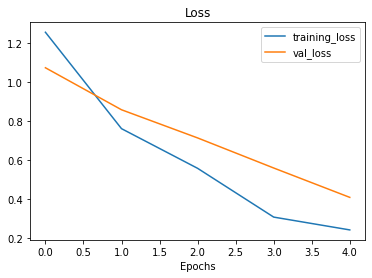

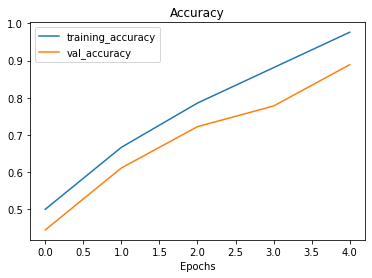

In [16]:
plot_loss_curves(history_0)

# ###### ###### (Fine Tuning) ####### ##### #


# 4 . Create Model Checkpoint

# 5 . Create Model 1 : Fine Tune

In [25]:
from tensorflow.python import train
#Bulding the model
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = True 

# Freeze all layers except for the last 10
for layer in base_model.layers[:-10]:
  layer.trainable = False

inputs = tf.keras.layers.Input(shape=(224,224,3),name='input_layer')
# x = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)(inputs)
x = base_model(inputs)
x = tf.keras.layers.GlobalAveragePooling2D(name='global_average_pooling_layer')(x)
outputs = tf.keras.layers.Dense(3,activation='softmax',name='output_layer')(x)
model_1 = tf.keras.Model(inputs,outputs)

# 6 . Compile Model

In [26]:
# Compile the model
model_1.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

# 7 . Fit Model

In [42]:
early_stopping_callback = tf.keras.callbacks.EarlyStopping(
monitor='val_loss', min_delta=0.05,
patience=3, restore_best_weights=True
)

In [43]:
# Fit the model
history_1 = model_1.fit(train_data_augmented,
                        epochs = 10,
                        validation_data = valid_data,
                        validation_steps = int(len(valid_data)),
                        initial_epoch = history_0.epoch[-1],
                        callbacks = [checkpoint_callback,early_stopping_callback])

Epoch 5/10
2/2 [==============================] - ETA: 0s - loss: 1.1110 - accuracy: 0.4048 
Epoch 5: saving model to Checkpoints_weights/feature_extracted_checkpoints.ckpt
2/2 [==============================] - 22s 9s/step - loss: 1.1110 - accuracy: 0.4048 - val_loss: 1.2201 - val_accuracy: 0.3333
Epoch 6/10
2/2 [==============================] - ETA: 0s - loss: 1.1594 - accuracy: 0.3333
Epoch 6: saving model to Checkpoints_weights/feature_extracted_checkpoints.ckpt
2/2 [==============================] - 6s 2s/step - loss: 1.1594 - accuracy: 0.3333 - val_loss: 1.2287 - val_accuracy: 0.3333
Epoch 7/10
2/2 [==============================] - ETA: 0s - loss: 1.1305 - accuracy: 0.3333
Epoch 7: saving model to Checkpoints_weights/feature_extracted_checkpoints.ckpt
2/2 [==============================] - 7s 4s/step - loss: 1.1305 - accuracy: 0.3333 - val_loss: 1.2382 - val_accuracy: 0.3333
Epoch 8/10
2/2 [==============================] - ETA: 0s - loss: 1.1250 - accuracy: 0.3810
Epoch 8: sav

# 8 . Evaluate Model

In [44]:
model_1.evaluate(valid_data)

1/1 [==============================] - 2s 2s/step - loss: 1.2201 - accuracy: 0.3333


[1.2200791835784912, 0.3333333432674408]

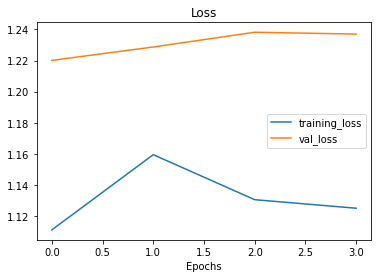

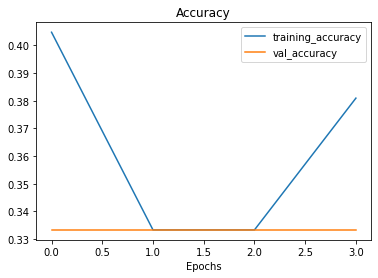

In [45]:
plot_loss_curves(history_1)

# ###### ########################## ##### #


# 9 . Save the Model

In [51]:
model_0.save('best_model_SavedModel_format')

# 10 . Prediction

Note : Could not successfully save the Fine Tuned Model

In [52]:
# Load the Model
# loaded_savedModel = tf.keras.models.load_model('/content/best_model_HDF5_format.h5')
reconstructed_model = tf.keras.models.load_model("best_model_SavedModel_format")

In [53]:
import cv2

In [54]:
img = cv2.imread('darthVader.jpeg')
img = cv2.resize(img,(224,224))     # resize image to match model's expected sizing
img = img.reshape(1,224,224,3)

In [55]:
reconstructed_model.predict(img).argmax()

1/1 [==============================] - 2s 2s/step


2